# Machine Learning-Classification, Regression and Clustering
<br><b>Name:</b> Karthik Maddipoti
<br><b>Course:</b> UCLA Python Workshop 2021
<br><b>Instructor:</b> Paul Deitel

____________

In [1]:
# Loading required packages
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from decimal import Decimal
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Machine Learning: Classification, Regression and Clustering

### 15.5 Using TSNE to Visualize the Digits Dataset in 3D
In Section 15.6, you visualized the Digits dataset’s clusters in two dimensions. In this exercise, you’ll create a 3D scatter plot using `TSNE` and Matplotlib’s **Axes3D**, which provides x-, y- and z-axes for plotting in three dimensions. To do so, load the Digits dataset, create a `TSNE` estimator that reduces data to three dimensions and call the estimator’s `fit_transform` method to reduce the dataset’s dimensions. Store the result in `reduced_data`. Next, execute the following code:

```python
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(9, 9))

axes = figure.add_subplot(111, projection='3d')

dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1],
                    zs=reduced_data[:, 2], c=digits.target,
                    cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
```

The preceding code imports Axes3D, creates a `Figure` and calls its `add_subplot` method to get an `Axes3D` object for creating a three-dimensional graph. In the call to the `Axes3D scatter` method, the keyword arguments `xs`, `ys` and `zs` specify one-dimensional arrays of values to plot along the x-, y- and z-axes. Once the graph is displayed, be sure to drag the mouse on the image to rotate it left, right, up and down so you can see the clusters from various angles. The following images show the initial 3D graph and two rotated views:

In [20]:
# Loading the 'digits' data from sklearn
from sklearn.datasets import load_digits
digits = load_digits()

In [21]:
# Creating a TNSE object to reduce the data to three dimensions
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=11)

In [22]:
# Reducing the 'digits' data to three dimensions
reduced_data = tsne.fit_transform(digits.data)
reduced_data.shape

(1797, 3)

In [23]:
# To interact with the 3D Plot
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
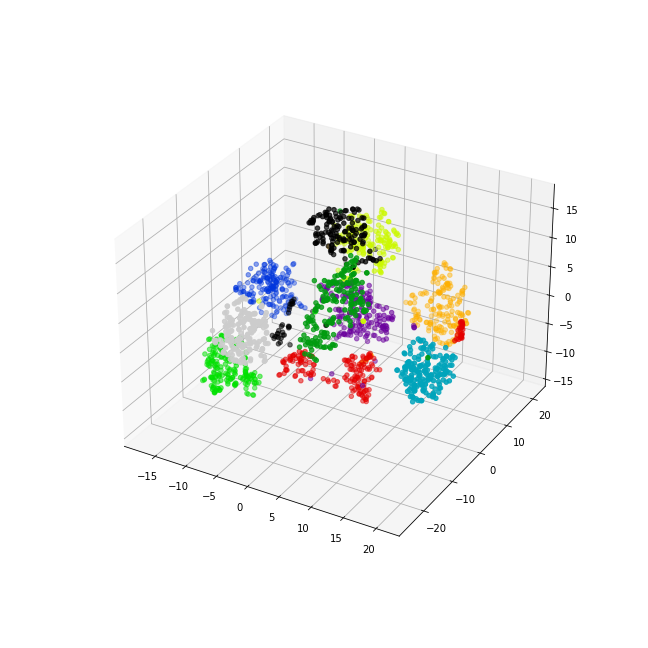

In [24]:
# Plotting the 3D graph of 'digits' data
figure = plt.figure(figsize=(9, 9))

axes = figure.add_subplot(projection='3d')

dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1],
                    zs=reduced_data[:, 2], c=digits.target,
                    cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

______

### 15.17 Binary Classification with the Breast Cancer Dataset

Check out the Breast Cancer Wisconsin Diagnostic dataset that’s bundled with scikit-learn

https://scikit-learn.org/stable/datasets/index.html#breast-cancerdataset

The dataset contains 569 samples, each with 30 features and a label indicating whether a tumor was malignant (0) or benign (1). There are only two labels, so this dataset is commonly used to perform binary classification. Using this dataset, reimplement the steps of this chapter’s classification case study in Sections 15.2–15.3. Use the `GaussianNB` (short for Gaussian Naive Bayes) estimator. When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a `LogisticRegression` classifier in the `estimators` dictionary. Logistic regression is another popular algorithm for binary classification.

In [2]:
# Loading the required packages
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# Loading the 'Breast Cancer' dataset from Scikit Learn
breast_cancer = load_breast_cancer()

In [4]:
# Storing the dataset in a pandas dataframe
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df["target"] = breast_cancer.target
breast_cancer_df.shape

(569, 31)

In [5]:
# Sample of the dataset
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Distribution of class in the 'target' column
print(f'Labels for malignant tumor: (0) and for benign tumor: (1)')
print(breast_cancer_df['target'].value_counts())

Labels for malignant tumor: (0) and for benign tumor: (1)
1    357
0    212
Name: target, dtype: int64


**We have 357 records (62.74%) corresponding to benign tumor and 212 records (37.26%) corresponding to malignant tumor**

In [7]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

In [8]:
# Summary of train and test data sets
print(f'Size of Train Dataset: {X_train.shape}')
print(f'\nSize of Test Dataset: {X_test.shape}')

Size of Train Dataset: (426, 30)

Size of Test Dataset: (143, 30)


#### Using GaussianNB classifier to predict type of tumor

In [9]:
# Initializing an GaussianNB object
gnb_model = GaussianNB()
gnb_model.fit(X=X_train, y=y_train)

GaussianNB()

In [10]:
# Predicting type of tumor using the trained model
predicted = gnb_model.predict(X=X_test)
expected = y_test

In [11]:
# Accuracy of the GaussianNB classifier
print(f'Accuracy of GaussianNB classifier: {gnb_model.score(X_test, y_test):.2%}')

Accuracy of GaussianNB classifier: 95.10%


In [12]:
# Creating confusion matrix to evaluate performance of the classifier
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(classification_report(expected, predicted, target_names=['Malignant Tumor', 'Benign Tumor']))

                 precision    recall  f1-score   support

Malignant Tumor       0.98      0.88      0.93        50
   Benign Tumor       0.94      0.99      0.96        93

       accuracy                           0.95       143
      macro avg       0.96      0.93      0.94       143
   weighted avg       0.95      0.95      0.95       143



In [13]:
%matplotlib inline

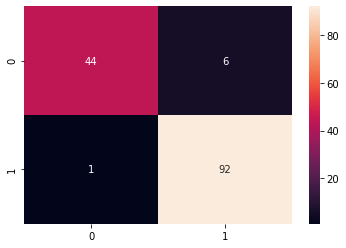

In [14]:
# Visualizing the confusion matrix
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
axes = sns.heatmap(confusion_df, annot=True)

In [15]:
# Training the GaussianNB classifier using K-fold cross validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=gnb_model, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

In [16]:
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 93.85%
Accuracy standard deviation: 2.75%


**Note:** The model accuracy has slightly dropped in the **K-fold cross validation** technique vs. using **train-test** split data. This can be attributed to the distribution of data in train and test set. In the **K-fold cross validation** technique, we iteratively train the model on 9 folds and test it on the remaining fold. Hence, we get the mean model accuracy. Whereas, in the **test-train split** technique, the model was never trained on the test data set and hence the accuracy also depends on the test-train distribution of the data**

#### Hyperparameter tuning of GaussianNB classifier

In [17]:
# Hyperparameter tuning
print(f'GuassianNB model performance: Hyperparameter tuning of variable smoothing parameter\n')
for s in [1e-07, 1e-08, 1e-09, 1e-10, 1e-11]:
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    gnb_model = GaussianNB(var_smoothing = s)
    scores = cross_val_score(estimator=gnb_model, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'Smoothing coefficient={s}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

GuassianNB model performance: Hyperparameter tuning of variable smoothing parameter

Smoothing coefficient=1e-07; mean accuracy=93.32%; standard deviation=3.22%
Smoothing coefficient=1e-08; mean accuracy=93.49%; standard deviation=2.24%
Smoothing coefficient=1e-09; mean accuracy=93.85%; standard deviation=2.75%
Smoothing coefficient=1e-10; mean accuracy=93.67%; standard deviation=2.64%
Smoothing coefficient=1e-11; mean accuracy=93.14%; standard deviation=3.02%


#### Comparing multiple classifiers

In [18]:
# Dictionary of classifiers we want to try
estimators = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=5000)
}

In [19]:
# Looping through each classifier and printing the model performance metrics
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' + 
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%


**Note:** We observe that the **Logistic Regression model** has the **best mean accuracy of 95.08%** as compared to other classifiers. It also has almost similar standard deviation in accuracy as compared to the other classifiers. Hence, we can conclude that **Logistic Regression** model performs the best out-of-the-box as compared to the other three classifiers. However, once we do hyperparameter tuning and feature engineering, other classifiers may be better than logistic regression!

_____